# 1. Setting up and get the data

## Download dependencies

In [ ]:
%pip install labelimg tensorflow tensorflow-gpu opencv-python matplotlib albumentations

: 

## Collect images (can collect on web or use capture)

In [ ]:
import os
import time
import uuid
import cv2

: 

### Setting up image path and use camera to collect image

In [15]:
IMAGES_PATH = os.path.join('data', 'images', 'face')
image_number = 30

In [16]:
cap = cv2.VideoCapture(0)
for imgnum in range(image_number):
    print('Collecting image {}'.format(imgnum))
    ret, frame = cap.read()
    imgname = os.path.join(IMAGES_PATH, f'{str(uuid.uuid1())}.jpg')
    cv2.imwrite(imgname, frame)
    cv2.imshow('frame', frame)
    time.sleep(0.5)

    if cv2.waitKey(1) & 0xFF == ord('q'):
        break
cap.release()
cv2.destroyAllWindows()

### Setting up label path and label all the images

In [17]:
IMAGES_PATH = os.path.join('data', 'images');
LABELIMG_PATH = os.path.join('libs', 'image_label_repo')

In [18]:
if not os.path.exists(LABELIMG_PATH):
    !mkdir {LABELIMG_PATH}
    !git clone https://github.com/tzutalin/labelImg {LABELIMG_PATH}

In [15]:
if os.name == 'posix':
    %make qt5py3
if os.name =='nt':
    %cd {LABELIMG_PATH}
    !pyrcc5 -o libs/resources.py resources.qrc

d:\Learning\FPT\AIT\Tensorflow\face_recognition\libs\image_label_repo


In [19]:
%cd {LABELIMG_PATH}
!python labelImg.py

d:\Learning\FPT\AIT\Tensorflow\face_recognition\libs\image_label_repo
Image:D:\Learning\FPT\AIT\Tensorflow\face_recognition\data\images\face\2a15f2ca-375e-11ed-be0c-086ac5699bea.jpg -> Annotation:D:/Learning/FPT/AIT/Tensorflow/face_recognition/data/labels/face_labels\2a15f2ca-375e-11ed-be0c-086ac5699bea.xml
Image:D:\Learning\FPT\AIT\Tensorflow\face_recognition\data\images\face\2a67fdbb-375e-11ed-96a8-086ac5699bea.jpg -> Annotation:D:/Learning/FPT/AIT/Tensorflow/face_recognition/data/labels/face_labels\2a67fdbb-375e-11ed-96a8-086ac5699bea.xml
Image:D:\Learning\FPT\AIT\Tensorflow\face_recognition\data\images\face\2aba5114-375e-11ed-942e-086ac5699bea.jpg -> Annotation:D:/Learning/FPT/AIT/Tensorflow/face_recognition/data/labels/face_labels\2aba5114-375e-11ed-942e-086ac5699bea.xml
ESC press
Cancel creation.
Image:D:\Learning\FPT\AIT\Tensorflow\face_recognition\data\images\face\2b5bbdcf-375e-11ed-85e8-086ac5699bea.jpg -> Annotation:D:/Learning/FPT/AIT/Tensorflow/face_recognition/data/labels/

## Review dataset and build image loading function

## import tensorflow and dependencies

In [43]:
import tensorflow as tf
import cv2
import lxml
import numpy as np
from matplotlib import pyplot as plt

### Limit GPU memory growth

In [44]:
gpus = tf.config.experimental.list_physical_devices('GPU')
for gpu in gpus:
    tf.config.experimental.set_memory_growth(gpu, True)

RuntimeError: Physical devices cannot be modified after being initialized

In [45]:
tf.config.list_physical_devices('GPU')

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

In [42]:
from google.colab import drive
drive.mount('/content/drive')

def load_image(filepath):
    raw_img = tf.io.read_file(filepath) 
    img_tensor_int = tf.image.decode_jpeg(raw_img, channels=3)
    img_tensor_flt = tf.image.convert_image_dtype(img_tensor_int, tf.float32)
    return img_tensor_flt, img_tensor_flt

def load_dataset(split):
    print('/content/drive/MyDrive/CelebAsubset/'+split+'/*.jpg')
    train_list_ds = tf.data.Dataset.list_files('/content/drive/MyDrive/CelebAsubset/'+split+'/*.jpg', shuffle=False)
    train_ds = train_list_ds.map(load_image)
    return train_ds

ModuleNotFoundError: No module named 'google.colab'

In [48]:
# load all images in image dataset
images = tf.data.Dataset.list_files('data\\images\\*.jpg')

InvalidArgumentError: Expected 'tf.Tensor(False, shape=(), dtype=bool)' to be true. Summarized data: b'No files matched pattern: data\\images\\*.jpg'

In [29]:
next_images = images.as_numpy_iterator().next();

print(next_images);

NameError: name 'images' is not defined

In [9]:
def load_image(x):
    byte_image = tf.io.read_file(x)
    img = tf.io.decode_jpeg(byte_image)
    return img

In [10]:
images = images.map(load_image)

In [11]:
next_images = images.as_numpy_iterator().next();

print(next_images);

[[[ 41 208 255]
  [ 29 196 251]
  [ 12 178 236]
  ...
  [  9 178 247]
  [  7 176 245]
  [  5 174 243]]

 [[ 37 204 255]
  [ 28 195 250]
  [ 15 181 239]
  ...
  [ 10 179 248]
  [  9 178 247]
  [  9 178 247]]

 [[ 32 197 253]
  [ 28 193 249]
  [ 21 186 244]
  ...
  [  8 177 246]
  [ 14 183 252]
  [ 18 187 255]]

 ...

 [[138  94  47]
  [136  92  45]
  [134  90  43]
  ...
  [ 15  14  10]
  [  7   6   2]
  [  1   0   0]]

 [[137  93  44]
  [135  91  42]
  [133  89  42]
  ...
  [  6   5   1]
  [  3   2   0]
  [  1   0   0]]

 [[135  91  42]
  [134  90  41]
  [132  88  41]
  ...
  [  1   0   0]
  [  2   1   0]
  [  4   3   0]]]


In [15]:
type(images)

tensorflow.python.data.ops.dataset_ops.MapDataset

In [47]:
image_generator = images.batch(1).as_numpy_iterator()

In [18]:
print(image_generator)

In [56]:
plot_img = image_generator.next()

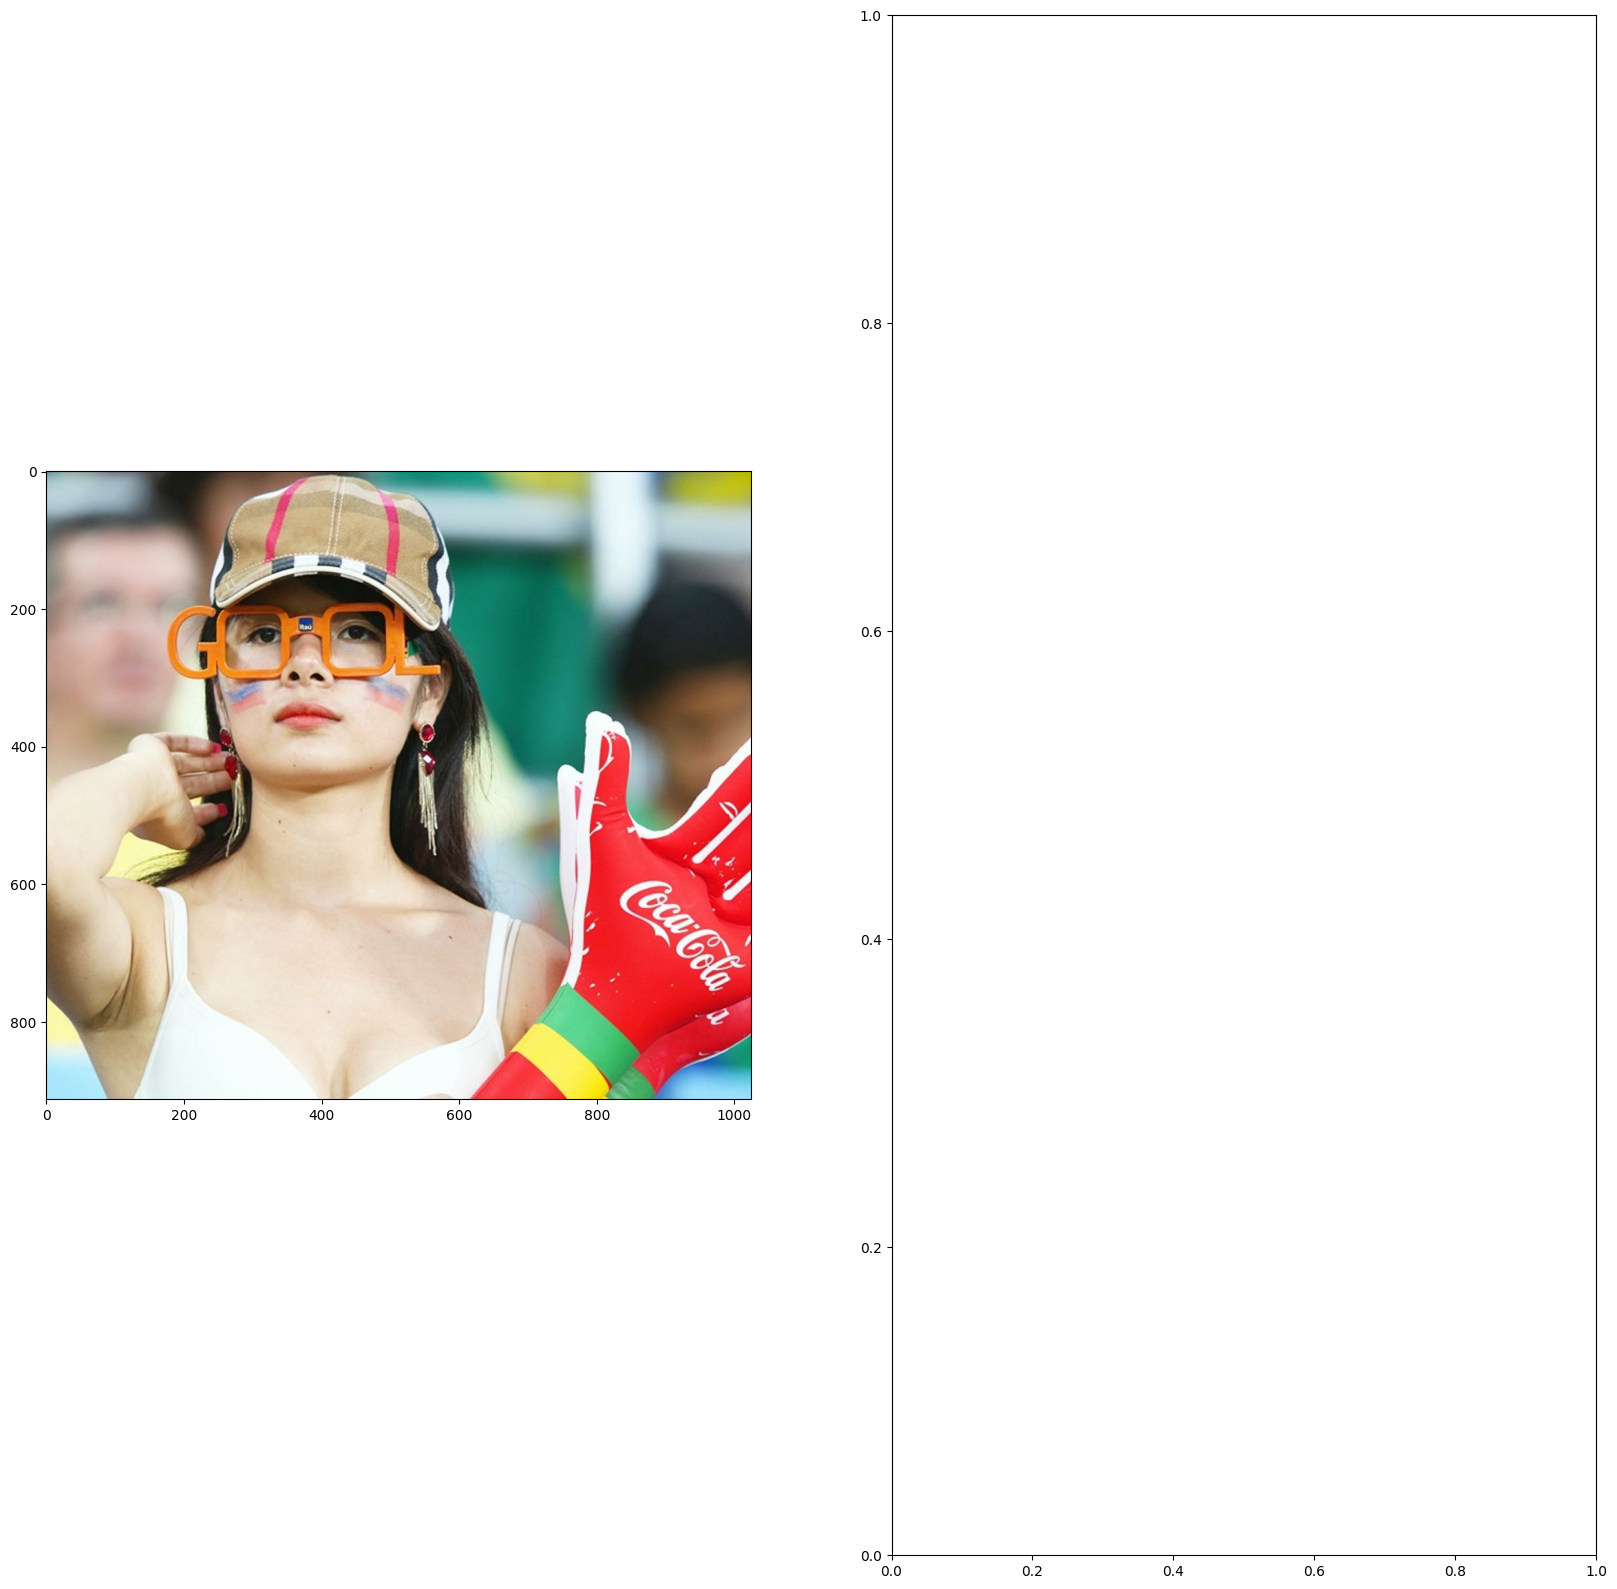

In [58]:

fig, ax = plt.subplots(ncols=2, figsize=(20,20))
for idx, image in enumerate(plot_img):
    ax[idx].imshow(image)
plt.show()

In [59]:
%pip install split-folders

In [60]:
import splitfolders

In [63]:
input_folder = 'data/images/'

splitfolders.ratio(input_folder, output='data/images', seed=42, ratio=(.6,.2,.2), group_prefix=None)

Copying files: 90 files [00:00, 567.73 files/s]


In [67]:
images_list_folder = ['train', 'val', 'test']
for image_folder in images_list_folder:
    for file in os.listdir(os.path.join('data', 'images', image_folder, 'face')):
        filename = file.split('.')[0] + '.xml'
        existing_filepath = os.path.join('data', 'labels', 'face_labels', filename)
        if os.path.exists(existing_filepath):
            new_filepath = os.path.join('data', 'labels', image_folder, filename)
            os.replace(existing_filepath, new_filepath)

In [137]:
img = cv2.imread(os.path.join('data', 'images', 'train', 'face', '0_Parade_Parade_0_336.jpg'))

In [139]:
img.shape

(683, 1024, 3)

In [140]:
type(img)

numpy.ndarray

In [141]:
%pip install xmltodict

^C
Note: you may need to restart the kernel to use updated packages.


In [142]:
import xmltodict

In [143]:


from pprint import pprint


with open (os.path.join('data', 'labels', 'train', '0_Parade_Parade_0_336.xml'), 'r') as file:
    my_xml = file.read()

label = xmltodict.parse(my_xml)

pprint(label, indent = 2)


{ 'annotation': { 'filename': '0_Parade_Parade_0_336.jpg',
                  'folder': 'images',
                  'object': { 'bndbox': { 'xmax': '632',
                                          'xmin': '407',
                                          'ymax': '328',
                                          'ymin': '59'},
                              'difficult': '0',
                              'name': 'face',
                              'pose': 'Unspecified',
                              'truncated': '0'},
                  'path': 'D:\\Learning\\FPT\\AIT\\Tensorflow\\face_recognition\\data\\images\\0_Parade_Parade_0_336.jpg',
                  'segmented': '0',
                  'size': {'depth': '3', 'height': '683', 'width': '1024'},
                  'source': {'database': 'Unknown'}}}


In [144]:
label['annotation']['object']['bndbox']

{'xmin': '407', 'ymin': '59', 'xmax': '632', 'ymax': '328'}

In [145]:
coords = [0, 0, 0, 0]
coords[0] = int(label['annotation']['object']['bndbox']['xmin'])
coords[1] = int(label['annotation']['object']['bndbox']['ymin'])
coords[2] = int(label['annotation']['object']['bndbox']['xmax'])
coords[3] = int(label['annotation']['object']['bndbox']['ymax'])

In [146]:
coords

[407, 59, 632, 328]

In [147]:
coords = list(np.divide(coords, [640, 480,640,480]))

In [148]:
import albumentations as alb

In [149]:
augmentor = alb.Compose([
    alb.RandomCrop(width=450, height=450),
    alb.HorizontalFlip(p=0.5),
    alb.RandomGamma(p=0.2),
    alb.RandomBrightnessContrast(p=0.2),
    alb.RGBShift(p=0.2),
    alb.VerticalFlip(p=0.5)
], bbox_params=alb.BboxParams(format='albumentations', label_fields=['class_labels']))

In [150]:
augmented = augmentor(image=img, bboxes=[coords], class_labels=['face'])

In [151]:
augmented['class_labels']

['face']

In [152]:
cv2.rectangle(
    augmented['image'],
    tuple(np.multiply(augmented['bboxes'][0][:2], [450, 450]).astype(int)),
    tuple(np.multiply(augmented['bboxes'][0][2:], [450, 450]).astype(int)),
    (250, 0, 0), 2
)

array([[[ 31,  28,  24],
        [ 32,  29,  25],
        [ 35,  32,  28],
        ...,
        [245, 207, 195],
        [244, 206, 194],
        [244, 206, 194]],

       [[ 32,  29,  25],
        [ 32,  29,  25],
        [ 34,  31,  27],
        ...,
        [245, 207, 195],
        [244, 206, 194],
        [243, 205, 193]],

       [[ 33,  30,  26],
        [ 33,  30,  26],
        [ 34,  31,  27],
        ...,
        [245, 207, 195],
        [244, 206, 194],
        [243, 205, 193]],

       ...,

       [[116, 142, 179],
        [116, 142, 179],
        [117, 143, 179],
        ...,
        [ 32,  30,  29],
        [ 31,  29,  28],
        [250,   0,   0]],

       [[115, 144, 181],
        [115, 144, 181],
        [116, 145, 182],
        ...,
        [ 31,  29,  28],
        [ 30,  28,  27],
        [250,   0,   0]],

       [[117, 147, 182],
        [118, 148, 183],
        [117, 147, 182],
        ...,
        [250,   0,   0],
        [250,   0,   0],
        [250,   0,   0]]

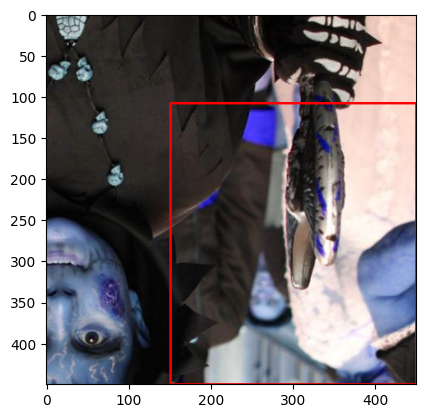

In [153]:
plt.imshow(augmented['image'])

In [125]:
import json

In [161]:
def check_bbox(bbox):
    for i in range(4):
        if (bbox[i]<0):
            bbox[i]=0
        elif (bbox[i]>1):
            bbox[i]=1

    return tuple(bbox)

In [180]:
for partition in ['train', 'val', 'test']:
    for image in os.listdir(os.path.join('data', 'images', partition, 'face')):
        print('folder: ' + partition + 'image: ' + image)
        img = cv2.imread(os.path.join(os.path.join('data', 'images', partition, 'face', image)))

        coords = [0, 0, 0.00001, 0.00001]
        label_path = os.path.join('data', 'labels', partition, f'{image.split(".")[0]}.xml')
        if (os.path.exists(label_path)):
            with open(label_path, 'r') as file:
                my_xml = file.read()
                
            label = xmltodict.parse(my_xml)
            coords[0] = int(label['annotation']['object']['bndbox']['xmin'])
            coords[1] = int(label['annotation']['object']['bndbox']['ymin'])
            coords[2] = int(label['annotation']['object']['bndbox']['xmax'])
            coords[3] = int(label['annotation']['object']['bndbox']['ymax'])
            print('finish extract data: ' + label['annotation']['filename'])
            coords = list(np.divide(coords, [640, 480, 640, 480]))
        
        try:
            for x in range(60):
                new_bbox = check_bbox(coords)
                augmented = augmentor(image=img, bboxes=[coords], class_labels=['face'])
                cv2.imwrite(os.path.join('aug_data', partition, 'images', f'{image.split(".")[0]}.jpg'), augmented['image'])

                annotation = {}
                annotation['image'] = image

                if os.path.exists(label_path):
                    if len(augmented['bboxes']) == 0:
                        annotation['bbox'] = [0,0,0,0]
                        annotation['class'] = 0
                    else:
                        annotation['bbox'] = augmented['bboxes'][0]
                        annotation['class'] = 1
                else:
                    annotation['bbox'] = [0,0,0,0]
                    annotation['class'] = 0
                
                with open(os.path.join('aug_data', partition, 'labels', f'{image.split(".")[0]}.json'), 'w') as file:
                    json.dump(annotation, file)
        except Exception as e:
            print(e)


folder: trainimage: 0_Parade_Parade_0_336.jpg
finish extract data: 0_Parade_Parade_0_336.jpg
folder: trainimage: 0_Parade_Parade_0_577.jpg
finish extract data: 0_Parade_Parade_0_577.jpg
folder: trainimage: 28_Sports_Fan_Sports_Fan_28_517.jpg
finish extract data: 28_Sports_Fan_Sports_Fan_28_517.jpg
folder: trainimage: 28_Sports_Fan_Sports_Fan_28_589.jpg
finish extract data: 28_Sports_Fan_Sports_Fan_28_589.jpg
folder: trainimage: 28_Sports_Fan_Sports_Fan_28_654.jpg
finish extract data: 28_Sports_Fan_Sports_Fan_28_654.jpg
folder: trainimage: 28_Sports_Fan_Sports_Fan_28_674.jpg
finish extract data: 28_Sports_Fan_Sports_Fan_28_674.jpg
folder: trainimage: 29_Students_Schoolkids_Students_Schoolkids_29_123 - Copy.jpg
finish extract data: 29_Students_Schoolkids_Students_Schoolkids_29_123 - Copy.jpg
folder: trainimage: 29_Students_Schoolkids_Students_Schoolkids_29_334 - Copy (2).jpg
finish extract data: 29_Students_Schoolkids_Students_Schoolkids_29_334 - Copy (2).jpg
folder: trainimage: 29_Stude

In [217]:
train_images = tf.data.Dataset.list_files('aug_data\\train\\images\\*.jpg', shuffle=False)
train_images = train_images.map(load_image)
train_images = train_images.map(lambda x : tf.image.resize(x, (120, 120)))
train_images = train_images.map(lambda x : x / 255)

In [218]:
test_images = tf.data.Dataset.list_files('aug_data\\test\\images\\*.jpg', shuffle=False)
test_images = test_images.map(load_image)
test_images = test_images.map(lambda x : tf.image.resize(x, (120, 120)))
test_images = test_images.map(lambda x : x / 255)

In [220]:
val_images = tf.data.Dataset.list_files('aug_data\\val\\images\\*.jpg', shuffle=False)
val_images = val_images.map(load_image)
val_images = val_images.map(lambda x : tf.image.resize(x, (120, 120)))
val_images = val_images.map(lambda x : x / 255)

In [221]:
train_images.as_numpy_iterator().next()

array([[[0.09950981, 0.05637255, 0.07990196],
        [0.09932598, 0.05618872, 0.07971814],
        [0.10018382, 0.05704657, 0.08057598],
        ...,
        [0.19362745, 0.14656863, 0.18578431],
        [0.19479166, 0.14773284, 0.18694852],
        [0.19944853, 0.1523897 , 0.19160539]],

       [[0.09932598, 0.05618872, 0.071875  ],
        [0.10153186, 0.05839461, 0.07408088],
        [0.09846814, 0.05533088, 0.07101715],
        ...,
        [0.19601716, 0.14895834, 0.18817402],
        [0.19221814, 0.14515932, 0.184375  ],
        [0.19087009, 0.14381127, 0.18302695]],

       [[0.09430147, 0.05116422, 0.07469363],
        [0.09803922, 0.05490196, 0.07843138],
        [0.09810049, 0.05496323, 0.07849265],
        ...,
        [0.18529412, 0.1382353 , 0.17745098],
        [0.19166666, 0.14460784, 0.18382353],
        [0.17726716, 0.13020833, 0.16942401]],

       ...,

       [[0.27450982, 0.26519608, 0.3245098 ],
        [0.2901961 , 0.2784314 , 0.34509805],
        [0.297549  , 0

In [222]:
def load_labels(label_path):
    with open(label_path.numpy(), 'r', encoding='utf-8') as file:
        label = json.load(file)
    return [label['class']], label['bbox']

In [223]:
train_labels = tf.data.Dataset.list_files('aug_data\\train\\labels\\*.json', shuffle=False)
train_labels = train_labels.map(lambda x : tf.py_function(load_labels, [x], [tf.uint8, tf.float16]))

In [224]:
test_labels = tf.data.Dataset.list_files('aug_data\\test\\labels\\*.json', shuffle=False)
test_labels = test_labels.map(lambda x : tf.py_function(load_labels, [x], [tf.uint8, tf.float16]))

In [225]:
val_labels = tf.data.Dataset.list_files('aug_data\\val\\labels\\*.json', shuffle=False)
val_labels = val_labels.map(lambda x : tf.py_function(load_labels, [x], [tf.uint8, tf.float16]))

In [226]:
val_labels.as_numpy_iterator().next()

(array([1], dtype=uint8), array([0., 0., 1., 1.], dtype=float16))

In [227]:
len(train_images), len(train_labels), len(test_images), len(test_labels), len(val_images), len(val_labels)

(51, 51, 17, 17, 14, 14)

In [228]:
train = tf.data.Dataset.zip((train_images, train_labels))
train = train.shuffle(5000)
train = train.batch(8)
train = train.prefetch(4)

In [229]:
test = tf.data.Dataset.zip((test_images, test_labels))
test = test.shuffle(5000)
test = test.batch(8)
test = test.prefetch(4)

In [230]:
val = tf.data.Dataset.zip((val_images, val_labels))
val = val.shuffle(5000)
val = val.batch(8)
val = val.prefetch(4)

In [231]:
train.as_numpy_iterator().next()[1]

(array([[1],
        [1],
        [1],
        [1],
        [1],
        [0],
        [1],
        [0]], dtype=uint8),
 array([[0.2134 , 0.2069 , 0.8105 , 1.     ],
        [0.01645, 0.     , 1.     , 1.     ],
        [0.     , 0.     , 0.0933 , 1.     ],
        [0.     , 0.     , 1.     , 1.     ],
        [0.     , 0.2018 , 0.0711 , 0.803  ],
        [0.     , 0.     , 0.     , 0.     ],
        [0.7344 , 0.     , 1.     , 0.04178],
        [0.     , 0.     , 0.     , 0.     ]], dtype=float16))

In [232]:
data_samples = train.as_numpy_iterator()

In [233]:
res = data_samples.next()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


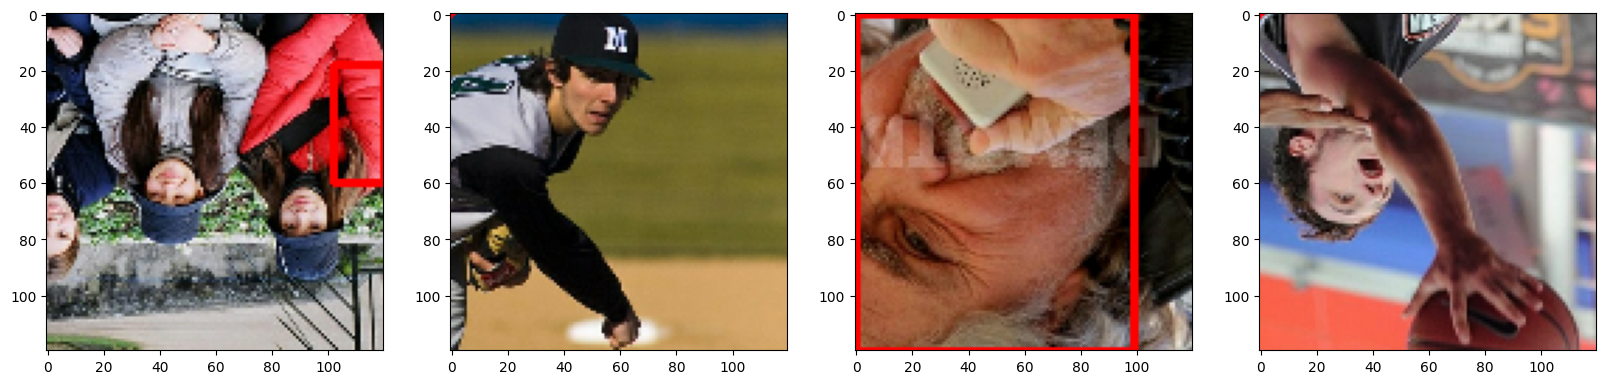

In [234]:
fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for idx in range(4): 
    sample_image = res[0][idx]
    sample_coords = res[1][1][idx]
    
    cv2.rectangle(sample_image, 
                  tuple(np.multiply(sample_coords[:2], [120,120]).astype(int)),
                  tuple(np.multiply(sample_coords[2:], [120,120]).astype(int)), 
                        (255,0,0), 2)

    ax[idx].imshow(sample_image)

In [235]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Conv2D, Dense, GlobalMaxPooling2D
from tensorflow.keras.applications import VGG16

In [236]:
vgg = VGG16(include_top=False)

In [237]:
vgg.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_4 (InputLayer)        [(None, None, None, 3)]   0         
                                                                 
 block1_conv1 (Conv2D)       (None, None, None, 64)    1792      
                                                                 
 block1_conv2 (Conv2D)       (None, None, None, 64)    36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, None, None, 64)    0         
                                                                 
 block2_conv1 (Conv2D)       (None, None, None, 128)   73856     
                                                                 
 block2_conv2 (Conv2D)       (None, None, None, 128)   147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, None, None, 128)   0     

In [238]:
def build_model(): 
    input_layer = Input(shape=(120,120,3))
    
    vgg = VGG16(include_top=False)(input_layer)

    # Classification Model  
    f1 = GlobalMaxPooling2D()(vgg)
    class1 = Dense(2048, activation='relu')(f1)
    class2 = Dense(1, activation='sigmoid')(class1)
    
    # Bounding box model
    f2 = GlobalMaxPooling2D()(vgg)
    regress1 = Dense(2048, activation='relu')(f2)
    regress2 = Dense(4, activation='sigmoid')(regress1)
    
    facetracker = Model(inputs=input_layer, outputs=[class2, regress2])
    return facetracker

In [239]:
facetracker = build_model()

In [240]:
facetracker.summary()

Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_5 (InputLayer)           [(None, 120, 120, 3  0           []                               
                                )]                                                                
                                                                                                  
 vgg16 (Functional)             (None, None, None,   14714688    ['input_5[0][0]']                
                                512)                                                              
                                                                                                  
 global_max_pooling2d_2 (Global  (None, 512)         0           ['vgg16[0][0]']                  
 MaxPooling2D)                                                                              

In [241]:
X, y = train.as_numpy_iterator().next()

In [242]:
X.shape

(8, 120, 120, 3)

In [243]:
classes, coords = facetracker.predict(X)

1/1 [==============================] - 7s 7s/step


In [244]:
classes, coords

(array([[0.6833223 ],
        [0.5803755 ],
        [0.7838581 ],
        [0.6330343 ],
        [0.66823167],
        [0.7803714 ],
        [0.7539459 ],
        [0.75276345]], dtype=float32),
 array([[0.49163172, 0.5102253 , 0.30271292, 0.46434736],
        [0.5380068 , 0.49237943, 0.31920525, 0.39827117],
        [0.45093033, 0.5806482 , 0.18666638, 0.4484278 ],
        [0.5419859 , 0.47601184, 0.35152453, 0.4497782 ],
        [0.4321041 , 0.6021547 , 0.24171364, 0.4453924 ],
        [0.38152644, 0.41183525, 0.27124605, 0.60484886],
        [0.42405996, 0.5959266 , 0.22505523, 0.48639005],
        [0.4740715 , 0.4592754 , 0.32586223, 0.48862088]], dtype=float32))

In [245]:
batches_per_epoch = len(train)
lr_decay = (1./0.75 -1)/batches_per_epoch

In [246]:
opt = tf.keras.optimizers.Adam(learning_rate=0.0001, decay=lr_decay)

In [247]:
def localization_loss(y_true, yhat):            
    delta_coord = tf.reduce_sum(tf.square(y_true[:,:2] - yhat[:,:2]))
                  
    h_true = y_true[:,3] - y_true[:,1] 
    w_true = y_true[:,2] - y_true[:,0] 

    h_pred = yhat[:,3] - yhat[:,1] 
    w_pred = yhat[:,2] - yhat[:,0] 
    
    delta_size = tf.reduce_sum(tf.square(w_true - w_pred) + tf.square(h_true-h_pred))
    
    return delta_coord + delta_size

In [248]:
classloss = tf.keras.losses.BinaryCrossentropy()
regressloss = localization_loss

In [249]:
localization_loss(y[1], coords)

<tf.Tensor: shape=(), dtype=float32, numpy=7.4941006>

In [250]:
classloss(y[0], classes)

<tf.Tensor: shape=(), dtype=float32, numpy=0.9512613>

In [251]:
regressloss(y[1], coords)

<tf.Tensor: shape=(), dtype=float32, numpy=7.4941006>

In [253]:
class FaceTracker(Model): 
    def __init__(self, eyetracker,  **kwargs): 
        super().__init__(**kwargs)
        self.model = eyetracker

    def compile(self, opt, classloss, localizationloss, **kwargs):
        super().compile(**kwargs)
        self.closs = classloss
        self.lloss = localizationloss
        self.opt = opt
    
    def train_step(self, batch, **kwargs): 
        
        X, y = batch
        
        with tf.GradientTape() as tape: 
            classes, coords = self.model(X, training=True)
            
            batch_classloss = self.closs(y[0], classes)
            batch_localizationloss = self.lloss(tf.cast(y[1], tf.float32), coords)
            
            total_loss = batch_localizationloss+0.5*batch_classloss
            
            grad = tape.gradient(total_loss, self.model.trainable_variables)
        
        opt.apply_gradients(zip(grad, self.model.trainable_variables))
        
        return {"total_loss":total_loss, "class_loss":batch_classloss, "regress_loss":batch_localizationloss}
    
    def test_step(self, batch, **kwargs): 
        X, y = batch
        
        classes, coords = self.model(X, training=False)
        
        batch_classloss = self.closs(y[0], classes)
        batch_localizationloss = self.lloss(tf.cast(y[1], tf.float32), coords)
        total_loss = batch_localizationloss+0.5*batch_classloss
        
        return {"total_loss":total_loss, "class_loss":batch_classloss, "regress_loss":batch_localizationloss}
        
    def call(self, X, **kwargs): 
        return self.model(X, **kwargs)

In [254]:
model = FaceTracker(facetracker)

In [255]:
model.compile(opt, classloss, regressloss)

In [256]:
logdir='logs'

In [257]:
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)

In [258]:
hist = model.fit(train, epochs=10, validation_data=val, callbacks=[tensorboard_callback])

Epoch 1/10
7/7 [==============================] - 11s 850ms/step - total_loss: 4.7859 - class_loss: 0.6981 - regress_loss: 4.4368 - val_total_loss: 4.5187 - val_class_loss: 0.6418 - val_regress_loss: 4.1979
Epoch 2/10
7/7 [==============================] - 1s 160ms/step - total_loss: 3.3920 - class_loss: 0.6692 - regress_loss: 3.0574 - val_total_loss: 2.1637 - val_class_loss: 0.6456 - val_regress_loss: 1.8409
Epoch 3/10
7/7 [==============================] - 1s 157ms/step - total_loss: 3.0894 - class_loss: 0.7221 - regress_loss: 2.7283 - val_total_loss: 3.1866 - val_class_loss: 0.5765 - val_regress_loss: 2.8984
Epoch 4/10
7/7 [==============================] - 1s 156ms/step - total_loss: 3.0048 - class_loss: 0.6820 - regress_loss: 2.6639 - val_total_loss: 2.6298 - val_class_loss: 0.5525 - val_regress_loss: 2.3536
Epoch 5/10
7/7 [==============================] - 1s 158ms/step - total_loss: 2.4787 - class_loss: 0.6391 - regress_loss: 2.1592 - val_total_loss: 3.3793 - val_class_loss: 0.6

In [259]:
hist.history

{'total_loss': [2.383964776992798,
  1.9266579151153564,
  1.3063628673553467,
  1.8680684566497803,
  0.821833610534668,
  1.4410896301269531,
  0.999505341053009,
  1.0123828649520874,
  0.25939807295799255,
  0.838222861289978],
 'class_loss': [0.6805148720741272,
  0.6324740052223206,
  0.9601851105690002,
  0.7869700789451599,
  0.7137238383293152,
  0.5383521914482117,
  0.4799143373966217,
  0.36375245451927185,
  0.0910130962729454,
  0.1638026386499405],
 'regress_loss': [2.0437073707580566,
  1.6104209423065186,
  0.826270341873169,
  1.474583387374878,
  0.464971661567688,
  1.171913504600525,
  0.7595481872558594,
  0.8305066823959351,
  0.21389153599739075,
  0.7563215494155884],
 'val_total_loss': [4.518746376037598,
  2.163696527481079,
  3.186594247817993,
  2.6298110485076904,
  3.3792624473571777,
  2.4576754570007324,
  3.0256826877593994,
  2.06471848487854,
  3.5773861408233643,
  2.054464340209961],
 'val_class_loss': [0.6417645812034607,
  0.6455988883972168,
  0

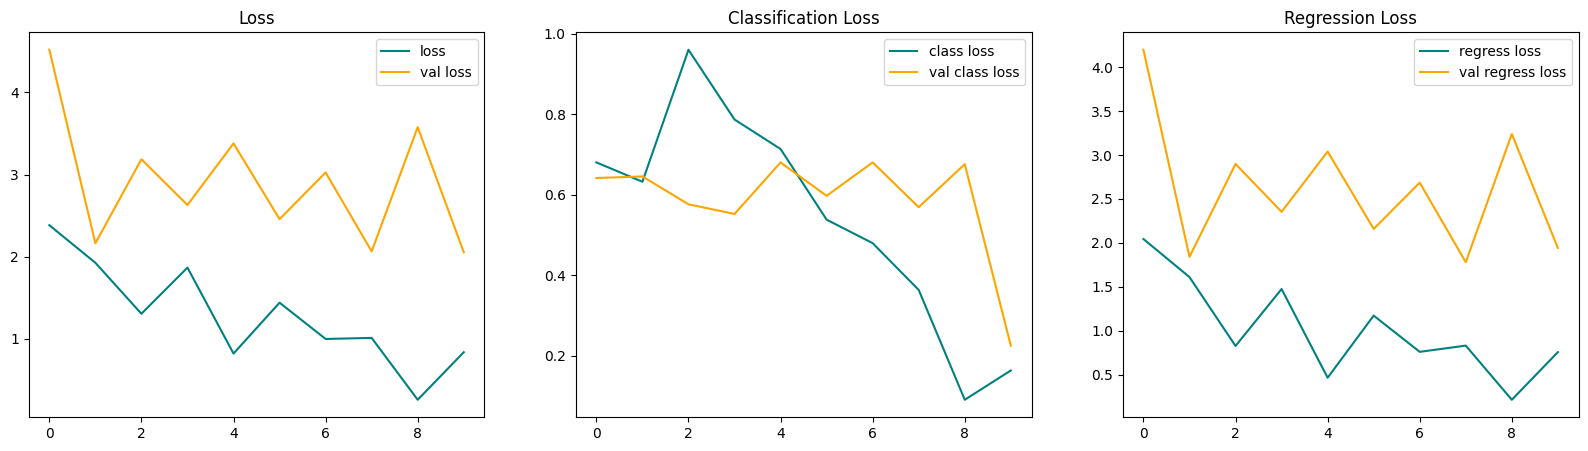

In [260]:
fig, ax = plt.subplots(ncols=3, figsize=(20,5))

ax[0].plot(hist.history['total_loss'], color='teal', label='loss')
ax[0].plot(hist.history['val_total_loss'], color='orange', label='val loss')
ax[0].title.set_text('Loss')
ax[0].legend()

ax[1].plot(hist.history['class_loss'], color='teal', label='class loss')
ax[1].plot(hist.history['val_class_loss'], color='orange', label='val class loss')
ax[1].title.set_text('Classification Loss')
ax[1].legend()

ax[2].plot(hist.history['regress_loss'], color='teal', label='regress loss')
ax[2].plot(hist.history['val_regress_loss'], color='orange', label='val regress loss')
ax[2].title.set_text('Regression Loss')
ax[2].legend()

plt.show()

In [261]:
test_data = test.as_numpy_iterator()

In [262]:
test_sample = test_data.next()

In [263]:
yhat = facetracker.predict(test_sample[0])

1/1 [==============================] - 0s 33ms/step


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


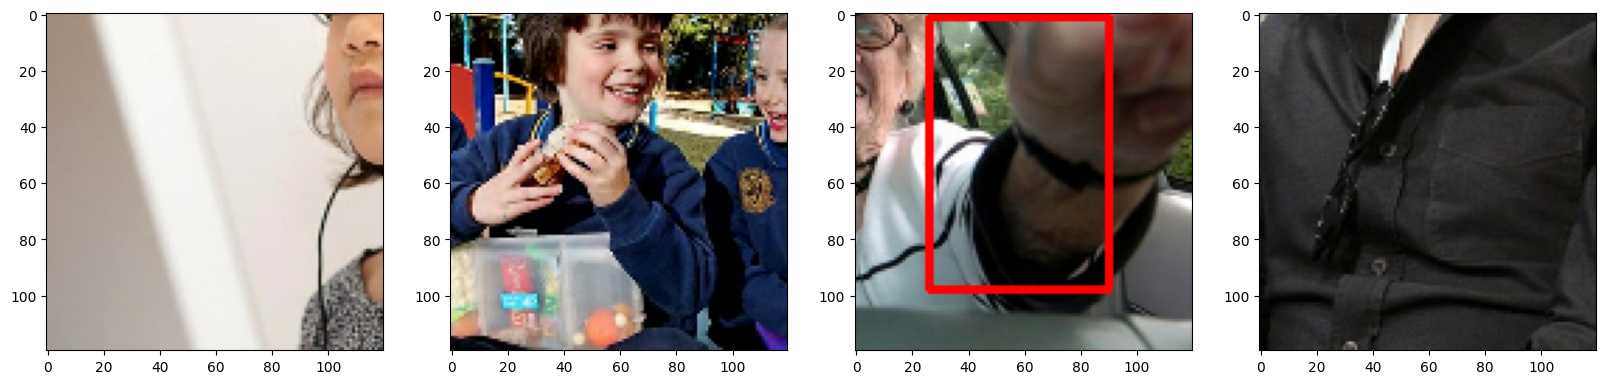

In [264]:
fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for idx in range(4): 
    sample_image = test_sample[0][idx]
    sample_coords = yhat[1][idx]
    
    if yhat[0][idx] > 0.9:
        cv2.rectangle(sample_image, 
                      tuple(np.multiply(sample_coords[:2], [120,120]).astype(int)),
                      tuple(np.multiply(sample_coords[2:], [120,120]).astype(int)), 
                            (255,0,0), 2)
    
    ax[idx].imshow(sample_image)

In [265]:
from tensorflow.keras.models import load_model

In [266]:
facetracker.save('facetracker.h5')

In [267]:
facetracker = load_model('facetracker.h5')

In [271]:
cap = cv2.VideoCapture(0)
while cap.isOpened():
    _ , frame = cap.read()
    frame = frame[50:500, 50:500,:]
    
    rgb = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
    resized = tf.image.resize(rgb, (120,120))
    
    yhat = facetracker.predict(np.expand_dims(resized/255,0))
    sample_coords = yhat[1][0]
    
    if yhat[0] > 0.5: 
        # Controls the main rectangle
        cv2.rectangle(frame, 
                      tuple(np.multiply(sample_coords[:2], [450,450]).astype(int)),
                      tuple(np.multiply(sample_coords[2:], [450,450]).astype(int)), 
                            (255,0,0), 2)
        # Controls the label rectangle
        cv2.rectangle(frame, 
                      tuple(np.add(np.multiply(sample_coords[:2], [450,450]).astype(int), 
                                    [0,-30])),
                      tuple(np.add(np.multiply(sample_coords[:2], [450,450]).astype(int),
                                    [80,0])), 
                            (255,0,0), -1)
        
        # Controls the text rendered
        cv2.putText(frame, 'face', tuple(np.add(np.multiply(sample_coords[:2], [450,450]).astype(int),
                                               [0,-5])),
                    cv2.FONT_HERSHEY_SIMPLEX, 1, (255,255,255), 2, cv2.LINE_AA)
    
    cv2.imshow('EyeTrack', frame)
    
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break
cap.release()
cv2.destroyAllWindows()

1/1 [==============================] - 0s 16ms/step


TypeError: 'NoneType' object is not subscriptable

: 